In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist, squareform

In [103]:
df_base = pd.read_csv(r'C:\Users\jonathan.perez\Documents\2. ESTUDOS\3. DADOS\livro - metodos multivariados de analise estatistica\Outros Dados\Capítulo 08\Crimes_Grp.csv', sep=';', decimal=',')\
    .iloc[:5,:-3]

df_base

,Região,HD,F
0,SJRP,10.85,1500.80
1,RP,14.13,1496.07
2,Bauru,8.62,1448.79
3,Campinas,23.04,1277.33
4,Sorocaba,16.04,1204.02


In [104]:
df_base_zscore = pd.DataFrame(StandardScaler().fit_transform(df_base.iloc[:, 1:]), columns=df_base.columns[1:], index=df_base.iloc[:, 0])
df_base_zscore

,HD,F
Região,,
SJRP,-0.742173,0.947535
RP,-0.081748,0.908697
Bauru,-1.191181,0.520480
Campinas,1.712273,-0.887381
Sorocaba,0.302829,-1.489330


C:\Users\jonathan.perez\AppData\Local\Temp\ipykernel_780\600193010.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (df_base_zscore["HD"][i], df_base_zscore["F"][i]),  # Coordenadas do ponto


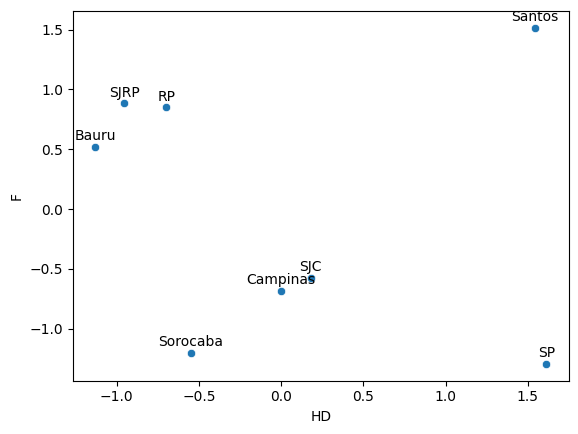

In [30]:
sns.scatterplot(df_base_zscore, x='HD', y='F')
for i in range(len(df_base_zscore)):
    plt.annotate(
        f'{df_base_zscore.index[i]}',  # Texto a ser exibido (no caso, o nome do dia)
        (df_base_zscore["HD"][i], df_base_zscore["F"][i]),  # Coordenadas do ponto
        
        textcoords="offset points",  # Coordenadas do texto
        xytext=(0, 5),  # Deslocamento do texto em relação ao ponto
        ha='center'  # Alinhamento horizontal
    )

# Distancias

Existem medidas de:

    Similaridade (Quanto maior o valor, maior a semelhanca entre os objetos) 
    Discimilaridade (Quanto maior o valor, mais diferentes sao os objetos)

## Numerica

In [ ]:
# distancias suportadas pela fun~cao pdist
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

In [58]:
#from sklearn.metrics import pairwise_distances
#similarity_matrix = np.square(pairwise_distances(df_dummies.to_numpy(), metric="euclidean"))

distancias_condensada = pdist(StandardScaler().fit_transform(df_base.iloc[:, 1:]), metric='euclidean') #retorna a matriz diagonal inferior (tirando a diagonal)

mt_distancias = squareform(distancias_condensada)
mt_distancias.round(2)

array([[0.  , 0.26, 0.41, 1.84, 2.13, 1.85, 3.37, 2.58],
       [0.26, 0.  , 0.54, 1.69, 2.06, 1.68, 3.15, 2.34],
       [0.41, 0.54, 0.  , 1.65, 1.82, 1.71, 3.29, 2.85],
       [1.84, 1.69, 1.65, 0.  , 0.75, 0.21, 1.73, 2.69],
       [2.13, 2.06, 1.82, 0.75, 0.  , 0.96, 2.17, 3.43],
       [1.85, 1.68, 1.71, 0.21, 0.96, 0.  , 1.6 , 2.5 ],
       [3.37, 3.15, 3.29, 1.73, 2.17, 1.6 , 0.  , 2.81],
       [2.58, 2.34, 2.85, 2.69, 3.43, 2.5 , 2.81, 0.  ]])

## Categorica

In [3]:
df_gasolina =  pd.read_excel(r'C:\Users\jonathan.perez\Documents\2. ESTUDOS\3. DADOS\livro - metodos multivariados de analise estatistica\Outros Dados\Capítulo 08\Gasolina.xlsx')
df_gasolina

,idade,ncarros,classe,potencia,cambio,modelo
0,20,1,A,baixa,automatico,esporte
1,37,3,A,alta,automatico,luxo
2,22,2,B,media,automatico,esporte
3,26,2,B,alta,automatico,esporte
4,45,2,C,media,manual,standard
5,42,1,D,baixa,manual,standard


#### Nominais

In [26]:
df_dummies = pd.get_dummies(df_gasolina, columns=['cambio', 'modelo', 'classe', 'potencia'], dtype = 'int')\
    .drop(columns=['cambio_manual', 'modelo_standard', 'classe_D', 'potencia_baixa', 'idade', 'ncarros']) #excluindo a coluna dummie que sera a referencia

df_dummies

,cambio_automatico,modelo_esporte,modelo_luxo,classe_A,classe_B,classe_C,potencia_alta,potencia_media
0,1,1,0,1,0,0,0,0
1,1,0,1,1,0,0,1,0
2,1,1,0,0,1,0,0,1
3,1,1,0,0,1,0,1,0
4,0,0,0,0,0,1,0,1
5,0,0,0,0,0,0,0,0


In [48]:
# MEDIDA DE DISCORDANCIA PARA DUMMIES
ar_distancia_euclideana = squareform(pdist(df_dummies, metric='euclidean'))

ar_medida_discordancia_dummies =  np.square(ar_distancia_euclideana)/df_dummies.shape[1] #dividivo pela quantidade de variaveis (comparaçoes)
ar_medida_discordancia_dummies.round(3)

array([[0.   , 0.375, 0.375, 0.375, 0.625, 0.375],
       [0.375, 0.   , 0.75 , 0.5  , 0.75 , 0.5  ],
       [0.375, 0.75 , 0.   , 0.25 , 0.5  , 0.5  ],
       [0.375, 0.5  , 0.25 , 0.   , 0.75 , 0.5  ],
       [0.625, 0.75 , 0.5  , 0.75 , 0.   , 0.25 ],
       [0.375, 0.5  , 0.5  , 0.5  , 0.25 , 0.   ]])

In [62]:
#MEDIDA DE DISCIMILARIEDADE DE JACCARD PARA DUMMIES
1 - squareform(pdist(df_dummies, metric='jaccard')).round(3)

array([[1.   , 0.4  , 0.4  , 0.4  , 0.   , 0.   ],
       [0.4  , 1.   , 0.143, 0.333, 0.   , 0.   ],
       [0.4  , 0.143, 1.   , 0.6  , 0.2  , 0.   ],
       [0.4  , 0.333, 0.6  , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.2  , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   ]])

In [61]:
#MEDIDA DE DISCIMILARIEDADE DE BRAYCURTIS PARA DUMMIES
squareform(pdist(df_dummies, metric='braycurtis')).round(3)

array([[0.   , 0.429, 0.429, 0.429, 1.   , 1.   ],
       [0.429, 0.   , 0.75 , 0.5  , 1.   , 1.   ],
       [0.429, 0.75 , 0.   , 0.25 , 0.667, 1.   ],
       [0.429, 0.5  , 0.25 , 0.   , 1.   , 1.   ],
       [1.   , 1.   , 0.667, 1.   , 0.   , 1.   ],
       [1.   , 1.   , 1.   , 1.   , 1.   , 0.   ]])

#### Ordinais

In [74]:
df_gasolina[['classe', 'potencia']]

,classe,potencia
0,A,baixa
1,A,alta
2,B,media
3,B,alta
4,C,media
5,D,baixa


In [68]:
# METODO SIMPLES
data = {'tamanho': ['pequeno', 'médio', 'grande', 'pequeno', 'grande']}
df = pd.DataFrame(data)

# Mapeamento ordinal
tamanho_mapping = {'pequeno': 1, 'médio': 2, 'grande': 3}
df['tamanho_ordinal'] = df['tamanho'].map(tamanho_mapping)

df

,tamanho,tamanho_ordinal
0,pequeno,1
1,médio,2
2,grande,3
3,pequeno,1
4,grande,3


In [88]:
# DUMMIES COM ORDEM

def dummie_coluna(coluna, prefix='dummie', order=[], nominal=True):
    n = coluna.nunique()

    if nominal: #nominal
        codigo_dummies = np.identity(n-1, dtype=int) #matriz identidade
        classes = coluna.unique() if not order else order
        #classes = coluna.unique().reshape(-1, 1) if not order else order
        
    else: #ordinal
        codigo_dummies = np.triu(np.ones((n-1, n-1), dtype=int)) #matriz triangular superior
        classes = order

    linha_zeros = np.zeros((1, n-1), dtype=int)
    matriz_dummies = np.vstack((codigo_dummies, linha_zeros))

    nome_colunas = [f'{prefix}_{str(i)}' for i in range(1, n)]
    dummies = pd.DataFrame(data=matriz_dummies, columns=nome_colunas)
    dummies.insert(0, 'classes', classes)  # Adiciona a coluna de classes
    
    base_dummies = pd.DataFrame(coluna).merge(dummies, how='left', left_on=coluna.name, right_on='classes')
    base_dummies.drop(columns=['classes'], inplace=True)
    
    return base_dummies

def dummies(base, nominal = {}, excluir_coluna_origem=False):
    """
    Cria dummies apenas de colunas categoricas
    
    base: (DataFrame) recebe um data frame da base, com ou sem, colunas numeriacas. E seleciona apenas as colunas categoricas, se quiser dummies de colunas numericas faça use dummie_coluna()
    nominal: (Dic) {'coluna': (nominal (True ou False), [lista da ordem])}
    excluir_coluna_origem: (bool) True ex
    """


    especial = base[nominal.keys()]
    padrao = base.select_dtypes(include=['object', 'category']).drop(especial.columns, axis=1)

    base_especial   = [dummie_coluna(especial[coluna], prefix=coluna, order=ordem[1], nominal=ordem[0]) for coluna, ordem in nominal.items()]
    base_padrao     = [dummie_coluna(padrao[coluna], prefix=coluna) for coluna in padrao.columns]

    if nominal == {}:
        base_dummies = pd.concat(base_padrao, axis=1)
    else:
        base_dummies = pd.concat([pd.concat(base_especial, axis=1), pd.concat(base_padrao, axis=1)], axis=1)

    if excluir_coluna_origem:
        base_dummies.drop(list(padrao.columns) + list(especial.columns), axis=1, inplace=True)


    return base_dummies

In [ ]:
lista = {   
            'classe': (False, ['A', 'B', 'C', 'D']),
            'potencia': (False, ['media', 'alta', 'baixa'])
        }

dummies(df_gasolina, lista, excluir_coluna_origem=True)

,classe_1,classe_2,classe_3,potencia_1,potencia_2,cambio_1,modelo_1,modelo_2
0,1,1,1,0,0,1,1,0
1,1,1,1,0,1,1,0,1
2,0,1,1,1,1,1,1,0
3,0,1,1,0,1,1,1,0
4,0,0,1,1,1,0,0,0
5,0,0,0,0,0,0,0,0


# Agrupamentos

Algoritmos para agrupar individuos a partir de uma matriz de distancias

## Hierarquico

    complete = distancia maxima: tende a formar grupos mais homogeneos
    single = distancia minima: server para encontrar pontos aberrantes (outliers) já que esse pontos serao agrupados por ultimo
    ward: fornece grupos com alta homogenidade interna

In [127]:
df_base_zscore = df_base_zscore.apply(lambda x: (x - x.mean())/x.std())
df_base_zscore

,HD,F
Região,,
SJRP,-0.663820,0.847501
RP,-0.073117,0.812763
Bauru,-1.065425,0.465531
Campinas,1.531503,-0.793698
Sorocaba,0.270859,-1.332097


In [144]:
ar_distancia_euclideana = pdist(df_base_zscore, metric='euclidean')
ar_agrupamento = shc.linkage(ar_distancia_euclideana, method='ward')
#ward(ar_distancia_euclideana)
ar_agrupamento

array([[0.        , 2.        , 0.55424509, 2.        ],
       [1.        , 5.        , 0.93158865, 3.        ],
       [3.        , 4.        , 1.37080268, 2.        ],
       [6.        , 7.        , 3.59803488, 5.        ]])

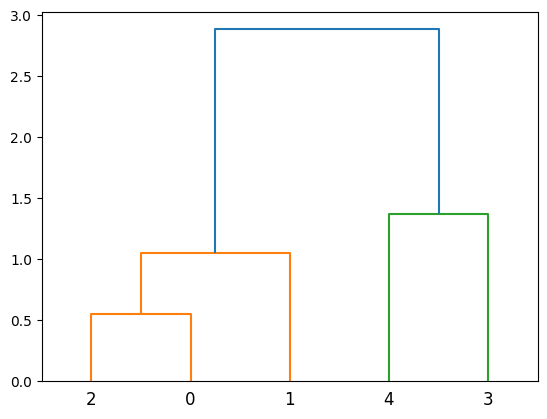

In [140]:
shc.dendrogram(ar_agrupamento)
plt.show()

In [163]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
df_base_zscore['cluster'] = clustering.fit_predict(df_base_zscore)
df_base_zscore

,HD,F,cluster
Região,,,
SJRP,-0.663820,0.847501,1
RP,-0.073117,0.812763,1
Bauru,-1.065425,0.465531,1
Campinas,1.531503,-0.793698,0
Sorocaba,0.270859,-1.332097,0


<Axes: xlabel='HD', ylabel='F'>

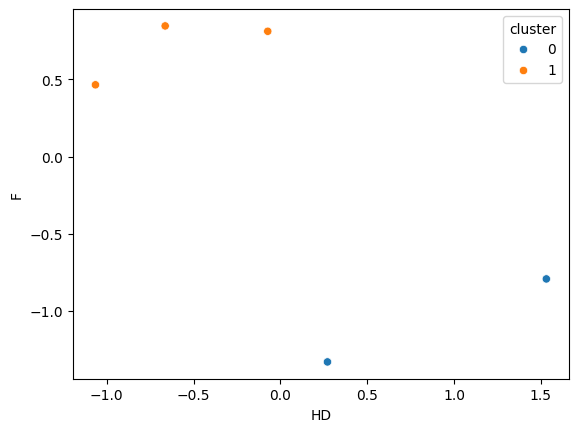

In [164]:
sns.scatterplot(df_base_zscore, x='HD', y='F', hue='cluster')

# K - Means

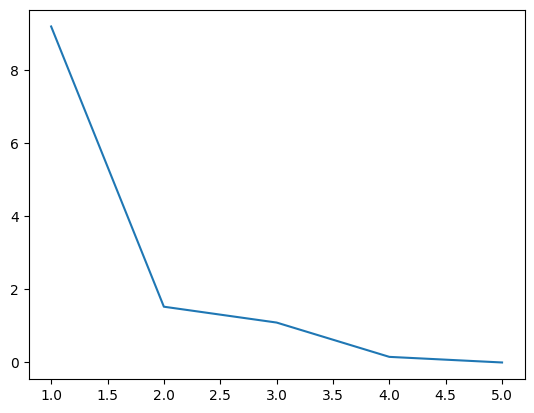

In [171]:
from sklearn.cluster import KMeans
inertia = []
K = range(1, 6)  # Testar k de 1 a 10
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df_base_zscore)
    inertia.append(kmeanModel.inertia_)

plt.plot(K, inertia)

In [172]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # n_init=10 executa o algoritmo 10 vezes com diferentes centroides iniciais e escolhe o melhor resultado.
df_base_zscore['cluster'] = kmeans.fit_predict(df_base_zscore)
df_base_zscore

,HD,F,cluster
Região,,,
SJRP,-0.663820,0.847501,0
RP,-0.073117,0.812763,0
Bauru,-1.065425,0.465531,0
Campinas,1.531503,-0.793698,1
Sorocaba,0.270859,-1.332097,1
